# Trabajo Práctico 2 - Matrices Insumo-Producto


## Imports.

In [3]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import scipy.linalg as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from IPython.display import display, HTML

import funciones as f
import funcionesTP1 as ftp1

## Consigna 1

Probar que:
$$
(I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ...    \Rightarrow   \lim_{n \to \infty} A^{n+1} = 0
$$

Planteo y desarrollo la primera ecuación:
$$
(I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ...
$$
Lo expreso de la siguiente manera tomando como convención que $A^{0}=I$
$$
(I-A)^{-1} = \sum_{j=0}^{\infty} A^{j}
$$
Y como la suma infinita de una serie es igual al límite de la sucesión de las sumas parciales de la serie planteo:
$$
(I-A)^{-1} = \lim_{n \to \infty} \sum_{j=0}^{\infty} A^{j}
$$
Multiplico $(I-A)$ en ambos lados
$$
(I-A)(I-A)^{-1} = (I-A)\lim_{n \to \infty} \sum_{j=0}^{\infty} A^{j}
$$
Como por hipotesis existe el limite puedo meter el $(I-A)$ para adentro de la sumatoria
$$
I = \lim_{n \to \infty} \sum_{j=0}^{\infty} A^{j}(I-A)
$$
$$
I = \lim_{n \to \infty} \sum_{j=0}^{\infty} A^{j} - A^{j+1}
$$
Noto que es una serie telescopica, es decir se cancelan todos los elementos menos $A^{0}$ y $-A^{n+1}$
$$
I = \lim_{n \to \infty} I-A^{n+1}
$$
Y como $I$ es constante su limite con $n$ tendiendo a $\infty$ es igual a $I$
$$
I = I - \lim_{n \to \infty} A^{n+1}
$$
$$
0 = - \lim_{n \to \infty} A^{n+1}
$$
$$
0 =  \lim_{n \to \infty} A^{n+1}
$$

## Consigna 2 - Graficamos los vectores $a_1$ y $a_2$, definidos con un tamaño de 250.

Creamos las matrices $A_1$ y $A_2$ tal como se describen en la consiga.

In [9]:
print("Matriz A1:\n")
print(f.A1)
print("Matriz A2:\n")
print(f.A2)

Matriz A1:

[[0.186 0.521 0.014 0.32  0.134]
 [0.24  0.073 0.219 0.013 0.327]
 [0.098 0.12  0.311 0.302 0.208]
 [0.173 0.03  0.133 0.14  0.074]
 [0.303 0.256 0.323 0.225 0.257]]
Matriz A2:

[[0.186 0.521 0.014 0.32  0.134]
 [0.24  0.073 0.219 0.013 0.327]
 [0.098 0.12  0.311 0.302 0.208]
 [0.173 0.03  0.133 0.14  0.074]
 [0.003 0.256 0.323 0.225 0.257]]


### Gráfica de la Norma del Vector por Posición

Realizamos el gráfico de puntos para cada posición i del vector, utilizando la función `graficarVector(matriz, tamaño), que devuelve un gráfico correspondiente.

La función `graficarVector` invoca a `vectorDeA_n`. Esta última calcula un vector donde cada posición i del vector representa la norma 2 de la matriz elevada a la potencia i:

posición i del vector: $\| A^i \|_2$

La función `vectorDeA_n(n, matrizOriginal)` devuelve un vector de dimensión n.


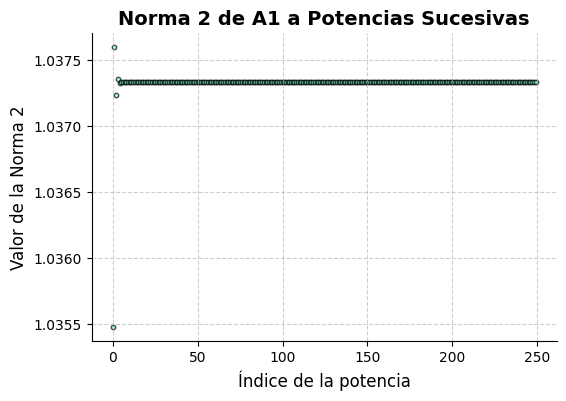

In [11]:
f.graficarVector(f.A1, 250)

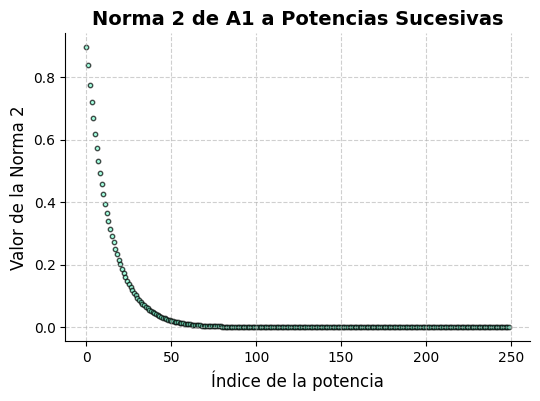

In [12]:
f.graficarVector(f.A2, 250)

A partir de lo demostrado en el punto 1, si una matriz tiende a cero en un límite específico, su norma 2 también tenderá a cero en ese mismo límite, dado que sus elementos se vuelven cada vez más pequeños. Esto implica que las combinaciones lineales que representan los valores singulares de la matriz también disminuirán en magnitud. Sin embargo, si la matriz contiene algunos elementos no nulos, aunque sean pequeños, estos podrían influir en el valor singular más grande, lo que podría alterar la convergencia esperada.

Considerando estas condiciones y excepciones, podemos inferir que, en principio, la matriz $A_2$ parece converger, ya que su norma 2 se aproxima al cero. En contraste, la matriz $A_1$ no muestra signos de convergencia hacia cero después de 250 iteraciones, lo que sugiere que este número de iteraciones podría no ser suficiente para determinar su convergencia. Es importante tener en cuenta que la convergencia no solo depende de si los elementos de la matriz se acercan a cero, sino también de la composición global y la distribución de los valores dentro de la matriz.

## Consigna 3

### Implementación del método de la potencia para las matrices $A_1$ y $A_2$

Esta función recibe un vector inicial $v_0$ y multiplica la matriz A por $v_0$ en la primera iteración. El resultado se almacena y, de manera recursiva, se calculan los siguientes estados durante k iteraciones, normalizando el vector en cada paso para evitar un crecimiento excesivo y mantener la dirección del cambio. De este modo, se obtiene el autovector asociado.

La función `metodoPotencia(A, v, k)` devuelve el mayor autovalor y su autovector correspondiente. El cálculo se realiza mediante la siguiente ecuación:

$autovalor = \frac{(v^T A v)}{(v^T v)}$

Adicionalmente, utilizando el método de Monte Carlo, generamos 250 vectores iniciales $v_0$ aleatorios con valores entre 0 y 1000. Para cada uno de estos vectores, aplicamos el método de la potencia con k = 8. También calculamos el promedio de los autovalores obtenidos con cada $v_0$ y su desviación estándar.

La función `monteCarlo(A)` devuelve el promedio del mayor autovalor calculado en cada iteración, junto con su desviación estándar.


In [16]:
prom_a1 ,DE_a1 = f.monteCarlo(f.A1) 
prom_a2 ,DE_a2 = f.monteCarlo(f.A2) 
tabla = pd.DataFrame({"Promedio":[prom_a1,prom_a2],"Desvio Estandar":[DE_a1,DE_a2]})
tabla.index = ["A1","A2"]
tabla

,Promedio,Desvio Estandar
A1,1.000001,0.000001
A2,0.927667,0.000033


Se ejecutó el método de la potencia un total de 8 veces, observándose que los valores presentan un pequeño desvío respecto al promedio, de aproximadamente $10^{-5}$ para la matriz $A_1$ y $10^{-4}$ para la matriz $A_2$. Con base en estos resultados, se concluye que el autovalor encontrado para la matriz $A_1$ es 1, mientras que para la matriz $A_2$ es 0.927.


## Consigna 4 

#### a) Graficar la serie de potencias para $n = 10$ y $n = 100$

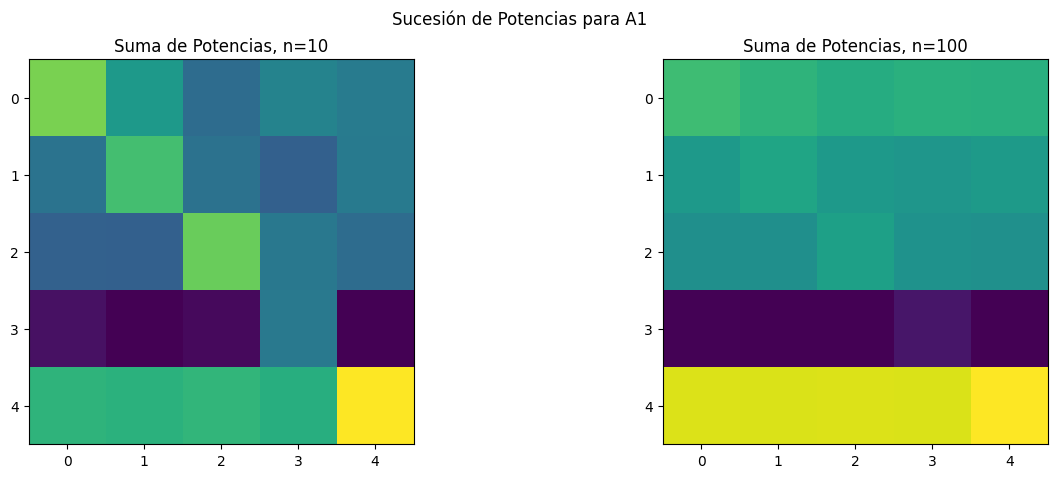

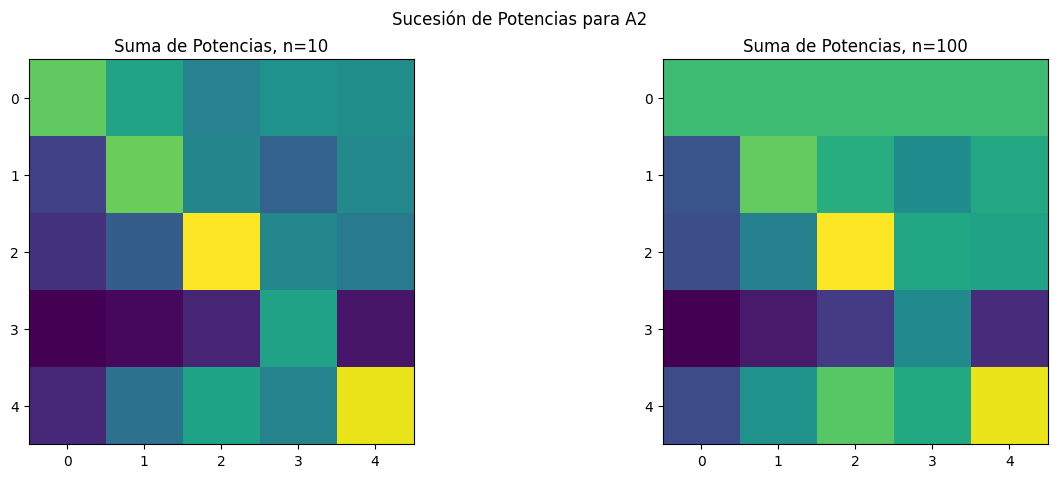

In [20]:
n_values = [10, 100]
Id = np.identity(f.A1.shape[0])
f.graficar_sucesion(f.A1, n_values, 'Sucesión de Potencias para A1')
f.graficar_sucesion(f.A2, n_values, 'Sucesión de Potencias para A2')

#### b) ¿Hay convergencia para ambas matrices? Argumentar la respuesta.

No, no hay convergencia para los dos matrices, A2 dentro de todo mantiene dentro de todo sus valores tanto en $n=10$ como en $n=100$ como se ve en el grafico, sin embargo en A1 los graficos cambian mucho como para decir que hay una convergencia.  

#### c)¿Podría establecer una regla por la cual se pueda aseguar convergencia de la serie infinita?

Como estamos trabajando con normas de matrices, noto la relación que tiene con el radio espectral de esta. Si $p(M) < 1$, entonces existe una norma $||.||$ tal que $||M|| = u < 1$, como todas las normas son equivalentes entonces vale para norma 2 también.
Aplico esto a una matriz $M^k$
$$
p(M)^k = p(M^k) \leq ||M^k|| 
$$
Como la norma es menor a 1, cuando se multiplica a si misma k veces con k tendiendo a infinito, se tiende a 0, es decir:
$$
\lim_{k \to \infty} ||M^{K}||. = 0
$$

#### d) En caso de existir convergencia, grafique el error obtenido como vector.

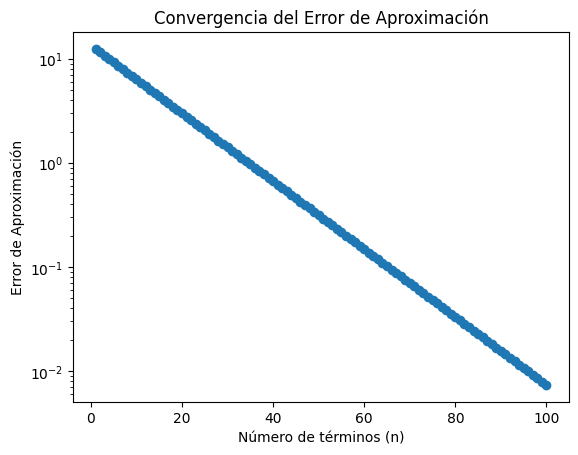

In [26]:
f.graficar_error(f.A2, Id, n_max=100)

## Consigna 5

- Creo $ A^{pp} y A^{nn} $ como en el TP1

In [29]:
matriz = pd.read_excel("matriz.xlsx", sheet_name ="LAC_IOT_2011",)
Nic_col = []    
Pry_col = []
for i in range(1,41): #Crea la lista de columnas a filtrar
    Nic_col.append('NICs'+str(i))
    Pry_col.append('PRYs'+str(i))
    
Pry = matriz[matriz["Country_iso3"] == "PRY"] # Crea la tabla con filas de PRY
Nic = matriz[matriz["Country_iso3"] == "NIC"] # Crea la tabla con filas de NIC
# Crea matrices intra-regionales
Pry_int= Pry.loc[:,Pry_col] 
Nic_int = Nic.loc[:,Nic_col]

- uso la funcion de metodo de la potencia con un vector aleatorio y lo comparo con los autovalores dados por __numpy.linalg.eig__

In [31]:
vect_Pry = np.random.randint(0,1000,size = Pry_int.shape[0]) #Creo vector aleatorio
aval_Pry,avect_Pry = f.metodoPotencia(Pry_int.to_numpy(),vect_Pry,250) #Uso metodo de la potencia
eigval_Pry,eigvect_Pry = LA.eig(Pry_int.to_numpy())

vect_Nic = np.random.randint(0,1000,size = Nic_int.shape[0])
aval_Nic,avect_Nic = f.metodoPotencia(Nic_int.to_numpy(),vect_Nic,250)
eigval_Nic,eigvect_Nic = LA.eig(Nic_int.to_numpy())

tabla = pd.DataFrame({"Aproximado":[aval_Pry,aval_Nic],"Real":[eigval_Pry[0],eigval_Nic[0]]})
tabla.index = ["Pry","Nic"]
tabla

,Aproximado,Real
Pry,1671.915673,1671.915673+ 0.000000j
Nic,441.458846,441.458846+ 0.000000j


## Consigna 6

Sea $n \geq 2$ y $E_n \in \mathbb{R}^{nxn}$ una matriz definida como $E_n = I_n - \frac{1}{n}ee^{t}$ donde $e \in \mathbb{R}^{n}$ es un vector columna de todos 1s y $I_n$ es la matriz identidad de $n x n$

(a) Probar que para cualquier vector $Z \in \mathbb{R}^{n}$, el promedio de las componentes del vector $E_nZ$ es 0. Analizar $E_nA$ y describit que efecto tiene $E_n$ sobre una matriz $A$ de n x n.


$$
Considerando:
Z = \begin{pmatrix}
z_1 \\
. \\
. \\
. \\
z_n
\end{pmatrix},\quad
E_n = I_n - \frac{1}{n}ee^{t}
$$

Primero desarrollo la multiplicacion entre $Z$ y $E_n$:

$$
(E_nZ)_{ij} = z_{j1}  (1-\frac{1}{n}) +  \sum_{k=1,k \neq j}^{n} z_{k1}(-\frac{1}{n})
$$
$$
(E_nZ)_{ij} = z_{j1}  - (\frac{z_{j1}}{n}) +  \sum_{k=1,k \neq j}^{n} z_{k1}(-\frac{1}{n})
$$
$$
(E_nZ)_{ij} = z_{j1}  +  \sum_{k=1}^{n} z_{k1}(-\frac{1}{n}) = z_{j1} - \sum_{k=1}^{n} \frac{z_{k1}}{n}
$$
Busco el promedio de $E_nZ$:
$$
Promedio = \sum_{k=1}^{n} \frac{z_{k1}}{n}
$$
$$
\frac{\sum_{j=1}^{n} (E_nZ)_{j1}}{n} = \frac{\sum_{j=1}^{n} z_{j1}-Promedio}{n} = \frac{\sum_{j=1}^{n} z_{j1}}{n} - \frac{\sum_{j=1}^{n} Promedio}{n}
$$
$$
Promedio - \frac{n Promedio}{n} = Promedio - Promedio = 0
$$
Finalmente concluyo que el efecto de la matriz $E_n$  es que resta el promedio de la columna a cada elemento perteneciente a esta.


(b) Calcular analíticamente todos los autovalores y autovectores de $E_n$. Determinar la imagen y el núcleo de $E_n$, y la dimensión de los mismos:

Propongo tal y como dice la sugerencia una base $B =$ {$e,d_2,...,d_n$}, planteo y desarrollo:
$$
E_ne = O = 0e
$$
Como se que $e$ es diferente al vector nulo implica que 0 es autovalor de $E_{n}$ con autovector $e$
Luego planteo:
$$
E_nd_i = (I_n - \frac{1}{n}ee^{t})d_i
$$
Con $i$ entre 2 y $n$ incluyendolos
$$
(I_n - \frac{1}{n}ee^{t})d_i = d_i-(\frac{1}{n}ee^{t})d_i
$$
como todo $d_i$ es ortogonal con $e^{t}$,   $(\frac{1}{n}ee^{t})d_i = 0$   ya que   $e^{t}d_i = 0$
$$
d_i = {\lambda}d_i
$$
Por lo tanto tengo que 1 es autovalor con multiplicadad aritmetica n-1 y autovectores todo $d_i$ con $i$ entre 2 y $n$. 
Ahora busco la Imagen y el nucleo de $E_n$, como se que todos los elementos de {$d_2,...,d_n$} pertenecen a la imagen, la dimensión de la imagen es por lo menos $n-1$ y como $e$ pertenece al Nucleo la dimensión de este es por lo menos 1.Por teorema de dimensión:
$$
n = dim(Ker(E_n)) + dim(Im(E_n))
$$
$$
n = 1 + n - 1
$$
$$
n = n
$$
Por lo tanto la imagen de $E_n$ se puede expresar como el subespacio generado por {$d_2,...,d_n$} y el nucleo es el subespacio generado por {$e$}


(c) Probar que $E_n$ es una matriz de proyección ortogonal. ¿Sobre qué subespacio proyecta?:


Para que $E_n$ sea proyector debe verificar que ${E_n}^{2} = E_n$
$$
E_nE_n = E_n
$$
$$
(I_n - \frac{1}{n}ee^{t})(I_n - \frac{1}{n}ee^{t}) = I_n - \frac{1}{n}ee^{t}
$$
$$
I_n - \frac{1}{n}ee^{t} - \frac{1}{n}ee^{t}   + (-\frac{1}{n}ee^{t})-\frac{1}{n}ee^{t}) = I_n - \frac{1}{n}ee^{t}
$$
Cancelo en ambos lados $I_n$ y $- \frac{1}{n}ee^{t}$
$$
-\frac{1}{n}ee^{t}- \frac{1}{n^{2}}ee^{t}ee^{t} = 0
$$
Factorizo por $ee^{t}$ y $-\frac{1}{n}$
$$
-\frac{1}{n}(I_n - \frac{1}{n}ee^{t})ee^{t} = 0
$$
$$
-\frac{1}{n}(E_n)ee^{t} = 0
$$
Como $e$ es parte del nucle de $E_n$, se cumple la igualdad y queda demostrado que $E_n$ es un proyector y como vimos en el item anterior su nucleo es ortogonal a la imagen por lo tanto es una proyeccion ortogonal que proyecta sobre {$d_2,...,d_n$}


(d) Responder Verdadero o Falso, demostrando o dando un contraejemplo:


($I$) $E_n$ es matriz ortogonal. Falso ya que para que sea matriz ortogonal debe cumplir que $E_nE_n^{t} = I_n$ sin embargo como es una matriz simetrica se cumple la siguiente igualdad $E_n = E_n^{t}$ que implica $E_nE_n^{t} = E_nE_n = E_n \neq I_n$.

($II$) $E_n$ es singular. Verdadero ya que su determinante es igual a la multiplicación de sus autovalores y como tiene un autovalor nulo el determinante es 0. 

($III$) $E_n$ es definida positiva. Falso ya que no todos sus autovalores son mayores a 0.

($IV$) $traza(E_n) = n - 1$. Verdadero, refiriendome a los elementos de $E_n$ de la diagonal como $a_{ii}$ se cumple que:
$$
\sum_{n}^{i = 1} a_{ii} = \sum_{n}^{i = 1} (1- \frac{1}{n}) = n(1- \frac{1}{n}) = n - 1
$$

## Consigna 7

<center></h1>Creo C dada por:</center></h1>

<center></h1>$C = {\overline{A^{pp}}}^{t} \, \overline{A^{pp}}/(40-1)$</center></h1>

<center></h1>donde  $\; \overline{A^{pp}} = E_{40}A^{pp}$, y $E_{n}$ es dada por: $E_{n} = I_{n} - \frac{1}{n}ee^{t}$</center></h1>

<center></h1>y $e \in \mathbb{R}^{n}$ es un vector columna de todos 1 </center></h1>


In [43]:
n = Pry_int.shape[0]
Id = np.identity(n)
e = np.ones(n)
En = Id - 1/n * (np.atleast_2d(e).T @ np.atleast_2d(e))
C = ((En @ Pry_int.to_numpy()).T @ (En @ Pry_int.to_numpy()))/(40-1) 

Defino la funcion para crear un vector aleatorio de norma 1 y una funcion usando el algoritmo de Hotelling, donde se itera de la siguiente forma:
$$
x_{1} = Cx_{0} / \| Cx_{0} \|
$$
$$
x_{k+1} = Cx_{k} / \| Cx_{k} \|
$$
Para encontrar el primer autovector con maximo autovalor.  
- Para obtener el autovalor se usa el coeficiente de Rayleigh $ \lambda = \frac{v_{1}^{t}Cv_{1}}{v_{1}^{t}v_{1}} $  
- Si tiene autovalor positivo, el criterio de parada va a ser cuando $\| x_{k+1}^{t}\ - x_{k} \|_{2} <$ _valor_ , donde _valor_ es 1e-6.  
- En cambio si su autovalor es negativo, se usa como criterio cuando $ |\lambda_{k}| - |\lambda_{k+1}|$ < _valor_ , esto se debe a que cuando el autovalor es negativo, el autovector va a oscilar entre un vector y su opuesto, por lo que la norma de la diferencia siempre va a ser 2. En cambio este segundo criterio si funciona ya que el autovalor si converge.


In [45]:
def create(n): 
     x = np.random.normal(size=n)
     x -= x.mean()
     return x / np.linalg.norm(x)
    
def Hotelling(A,v,valor):
    while True:
        v_prev = v
        vEstrella_prev = f.vectorEstrella(v_prev)
        aval_prev = (vEstrella_prev @ A @ v_prev) / (vEstrella_prev @ v_prev)
        
        v = A @ v
        v = v / np.linalg.norm(v)

        vEstrella = f.vectorEstrella(v)
        aval = (vEstrella @ A @ v) / (vEstrella @ v)
        res = vEstrella - v_prev
        
        if (aval >=0) and (np.linalg.norm(res,2) < valor):
            return aval,v 
            
        elif (aval < 0) and ((abs(aval)-abs(aval_prev)) < valor):
            return aval,v

Saco $v_{1}$ y $\lambda_{1}$ con la funcion Hotelling y comparo con lo dado por __numpy.linalg.eig__ 

In [47]:
valor = 1e-10
vect = create(n)
avalH, vectH = Hotelling(C,vect,valor)
eigval, eigvect = LA.eig(C)
tabla = pd.DataFrame({"Aproximado":[vectH,avalH],"Real":[eigvect[:,0],eigval[0]]})
tabla.index = ["Autovector","Autovalor"]
display(HTML(tabla.to_html()))

,Aproximado,Real
Autovector,"[0.4090087047726304, 0.00033992083582288666, -4.610057720516285e-11, 0.011151523490665454, 0.37846088058206406, 0.12108109819897774, 0.013663696705321388, 0.24657931935801317, 0.07203194910975985, 0.039034854371965036, 0.011377291539062187, 0.01402473683787262, 0.01321093065167759, 0.06143398980471577, 0.04470192544157531, -4.610057720516284e-11, 0.004135620253529219, 0.03289987510754206, 0.01695282329634607, 0.019135364077347387, 0.017485766640380387, 0.0037788359021239098, 0.0008681203728124772, 0.04389183581328825, 0.005206152973450993, -4.610057720516284e-11, 0.0037400392080321346, 1.2893586813319545e-05, 0.0025892530887255878, 0.004289244173085896, -1.1048003327217465e-08, 0.006111140471127714, 0.05300570442762754, 0.0611936127579997, 0.08461341379352101, 0.16356962833476874, 0.09727376955934137, 0.07425746505587723, 0.10262550133489677, 0.7284502351949503]","[-0.4090087047673543, -0.00033992083580566845, 4.610057607724139e-11, -0.011151523490106561, -0.3784608806542302, -0.12108109822641883, -0.013663696706769741, -0.2465793194129284, -0.07203194911907197, -0.03903485437000004, -0.011377291540038572, -0.01402473683692753, -0.013210930650902088, -0.06143398981481452, -0.04470192543920042, 4.6100577204212415e-11, -0.004135620253280921, -0.032899875106828944, -0.016952823295275244, -0.01913536407618905, -0.01748576663920414, -0.003778835901788525, -0.0008681203727354275, -0.04389183581100244, -0.005206152973176799, 4.6100577204212415e-11, -0.003740039207835976, -1.2893586812642952e-05, -0.002589253088589786, -0.004289244172853258, 1.1048003326989693e-08, -0.0061111404707963, -0.05300570442456344, -0.06119361275190778, -0.08461341378812286, -0.16356962832535132, -0.0972737695472178, -0.07425746504873165, -0.10262550132677913, -0.7284502351429782]"
Autovalor,85076.883207,85076.883207


Para encontrar $v_{2}$ y $\lambda_{2}$, se necesita encontrar $C'$, dada por:
$$
C' = C - \lambda_{1}v_{1}v_{1}^{t}
$$
Se vuelve a calcular Hotelling con $C'$ y otro vector aleatorio de norma 1 y se comparan los resultados con los dados por __numpy.linalg.eig__ 

In [49]:
vectHEstrella = f.vectorEstrella(vectH)
C2 = C - avalH * (vectH @ vectHEstrella)
vect2 = create(n)
avalH2, vectH2 = Hotelling(C2,vect2,valor)
eigval2,eigvect2 = LA.eig(C2)
tabla = pd.DataFrame({"Aproximado":[vectH2,avalH2],"Real":[eigvect2[:,0],eigval2[0]]})
tabla.index = ["Autovector","Autovalor"]
display(HTML(tabla.to_html()))

,Aproximado,Real
Autovector,"[0.1542084825515795, 0.1589874070932653, 0.15899169081404196, 0.15885723940317023, 0.15393685844514574, 0.15735098606818082, 0.15882427449439748, 0.1556568417943084, 0.15805235190080147, 0.15853063640477943, 0.15884127160870412, 0.15882398952655208, 0.15883413952318665, 0.15814730817867037, 0.1584652105494596, 0.15899169081404196, 0.15894411727907862, 0.15860008642999684, 0.1587995835171962, 0.15876510880106956, 0.15875373177582505, 0.15895299811996058, 0.15898280348899088, 0.15845806873815707, 0.1589275389000908, 0.15899169081404196, 0.1589456750316005, 0.15899153217679232, 0.1589598337930741, 0.1589388249900666, 0.1589916909496907, 0.15891644050536172, 0.15833315331120318, 0.15830238715712996, 0.15772089930295835, 0.15711915542725188, 0.15800468783574698, 0.1582524070716454, 0.15788614091744416, 0.15118971730241584]","[-0.15420848250579053, -0.15898740710283205, -0.1589916908236546, -0.15885723941125446, -0.15393685841129046, -0.15735098606428513, -0.15882427450230385, -0.1556568417763202, -0.1580523519017295, -0.15853063640900542, -0.15884127161691333, -0.15882398953421684, -0.15883413953097297, -0.15814730818118922, -0.15846521055289214, -0.1589916908236546, -0.15894411728811358, -0.15860008643515175, -0.15879958352442794, -0.15876510880803021, -0.15875373178310784, -0.15895299812902144, -0.1589828034984767, -0.15845806874175974, -0.15892753890899314, -0.1589916908236546, -0.15894567504070278, -0.1589915321864031, -0.15895983380233328, -0.15893882499909354, -0.15899169095930335, -0.15891644051413964, -0.15833315331358574, -0.15830238715793687, -0.15772089930175054, -0.15711915541402924, -0.15800468783083219, -0.15825240707030166, -0.15788614091232156, -0.15118971720771104]"
Autovalor,-3384111.834275,-3384111.834275


## Consigna 8

- Realizamos un grafico proyectando los datos en 2-D, proyectando los datos en las dos direcciones de mayor cambio. 
- Utilizamos _AgglomerativeClustering_ para encontrar clusters que se encuentren a una distancia euclidiana baja

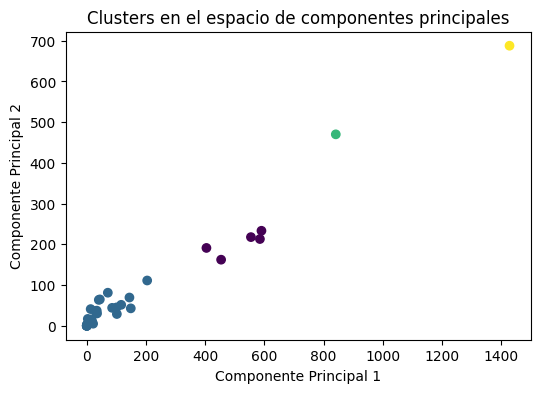

In [52]:
def proyectar(A,v1,v2):
    V = np.column_stack((v1,v2))
    return A @ V

Arr_proyectada = proyectar(Pry_int.to_numpy(),vectH,vectH2)


HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold = 200, n_clusters = None , linkage = 'single')
hc_comp.fit(Arr_proyectada)

fig , ax = plt.subplots(figsize =(6 ,4))
ax.scatter(Arr_proyectada[:,0], Arr_proyectada[:,1], c=hc_comp.labels_)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
ax.set_title('Clusters en el espacio de componentes principales')
plt.show()

## Consigna 9 - Encontrar cual es la relacion de H con la suma de potencias.

En el punto 1 se demostro que:

$(I−A)^{−1} = I + A + A2 + A3 + ... + An + ...$ 

Si multiplicamos ambos lados de esta ecuación por la matriz A obtenemos:

$A(I−A)^{−1} = A(I + A + A^2 + A^3 + ... + A^n)$ 

Esto se simplifica a:

$A(I−A)^{−1} = A + A^2 + A^3 + A^4 + ... + A^n$ 

Por lo tanto, podemos concluir que la matriz H es la suma de potencias de A, con la inclusión de la potencia $A^1$, que no estaba presente en la suma de potencias original.

## Consigna 10

El analisis lo vamos a llevar a cabo sobre la matriz creada en el TP1, creada con las matrices regionales.

In [56]:
A = Pry_int
H = A @ np.linalg.inv(np.identity(A.shape[0]) - A)

Realizamos el calculo de ACP por el metodo de la potencia implementado en la consigna 7. Lo realizamos de manera iterativa para poder conseguir la matriz V, base de autovectores. Pero como solo utilizaremos los primeros dos autovectores, no calculamos la V completa

In [58]:
def PrimerasNColumnasDeV_con_mP(matriz, n):
    d, _ = matriz.shape
    V = []  # Lista para almacenar los autovectores
    matriz_iterada = matriz.copy()

    for i in range(n):
        # Crear un vector inicial aleatorio
        vect = create(d)
        # Usamos Hotelling para obtener el autovector
        aval, vect = Hotelling(matriz_iterada, vect, valor)
        # Normalizamos el autovector
        vectEstrella = f.vectorEstrella(vect)
        # Actualizamos la matriz iterada (descontamos el componente encontrado)
        matriz_iterada -= aval * np.outer(vect, vectEstrella)
        # Añadimos el autovector encontrado a la lista
        V.append(vect)
    return np.array(V).T  # Devolvemos las primeras N columnas de V como una matriz

X, Mcov = f.centrarDatos(H)
V = PrimerasNColumnasDeV_con_mP(Mcov,2)

Realizamos un grafico proyectando los datos en 2-D, proyectando los datos en las dos direcciones de mayor cambio. 
Ademas, agregar el metodo de agrupamiento K-means al grafico, con n_clusters = 2. (se acerca bastante a algo que parecen clusters)

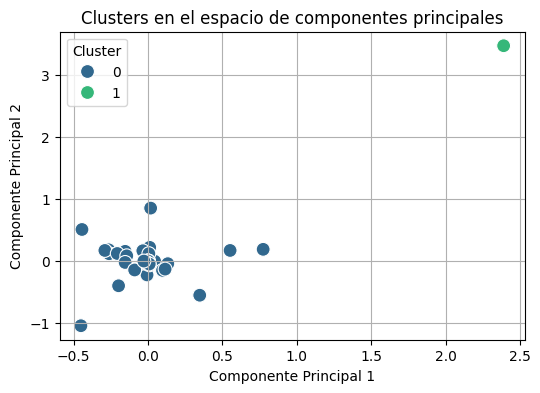

In [93]:
# Proyectar los datos en las dos primeras componentes principales
X_reducido = X @ V[:, :2]  # Transponer X para que las observaciones sean filas

# Aplicar K-means para encontrar clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Puedes ajustar el número de clusters
clusters = kmeans.fit_predict(X_reducido)

# Convertir el resultado a un DataFrame para facilitar la visualización
df_clusters = pd.DataFrame(X_reducido, columns=['Componente 1', 'Componente 2'])
df_clusters['Cluster'] = clusters

# Graficar los resultados
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clusters, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters en el espacio de componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [61]:
# Asumiendo que 'clusters' contiene las asignaciones de los clusters
df_clusters['Sector'] = df_clusters.index  # Asignamos los sectores (índices de las filas de H)
df_clusters['Cluster'] = clusters  # Asignamos los clusters obtenidos

# Mostrar los sectores (filas de A) y los clusters a los que pertenecen
for cluster_num in df_clusters['Cluster'].unique():
    sectors_in_cluster = df_clusters[df_clusters['Cluster'] == cluster_num]['Sector']
    print(f"Cluster {cluster_num} contiene los siguientes sectores (filas de H):")
    print(sectors_in_cluster.tolist(), "\n")
    
# Supongamos que ya tienes 'H' y has hecho la proyección PCA de X a 'X_reducido'
# Guarda los índices originales de H antes de realizar cualquier operación
df_clusters = pd.DataFrame(X_reducido, columns=['Componente 1', 'Componente 2'])
df_clusters['Sector'] = np.arange(len(H))  # Índices originales de las filas de H
df_clusters['Cluster'] = clusters  # Asigna los clusters obtenidos del algoritmo

# Mostrar los sectores agrupados por cluster
for cluster_num in df_clusters['Cluster'].unique():
    sectors_in_cluster = df_clusters[df_clusters['Cluster'] == cluster_num]['Sector']
    print(f"Cluster {cluster_num} contiene los siguientes sectores (filas de H):")
    print(sectors_in_cluster.tolist(), "\n")

Cluster 0 contiene los siguientes sectores (filas de H):
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39] 

Cluster 2 contiene los siguientes sectores (filas de H):
[3, 21] 

Cluster 1 contiene los siguientes sectores (filas de H):
[16] 

Cluster 3 contiene los siguientes sectores (filas de H):
[17, 18, 29] 

Cluster 0 contiene los siguientes sectores (filas de H):
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39] 

Cluster 2 contiene los siguientes sectores (filas de H):
[3, 21] 

Cluster 1 contiene los siguientes sectores (filas de H):
[16] 

Cluster 3 contiene los siguientes sectores (filas de H):
[17, 18, 29] 



Vemos que el analisis de K-means no es el ideal ya que tenemos outliers, y ademas los datos no se llega a identificar grupos ocultos en los datos o intuidos, sino que la densidad de distribucion de los mismos.

Incluso realizamos un analisis de DBSCAN que es robusto detectando outliers y puede encontrar clusters con formas geometricas arbitrarias, pero no obtenemos mejores resultados. 
El analisis de DBCAN identifico un solo cluster(el asignado con el numero cero) y el resto outliers (los valores violetas en -1). Esto considerando que utilizamos un epsilon de 0.5, que define la distancia máxima entre dos puntos para que sean considerados como parte del mismo vecindario (o grupo). 

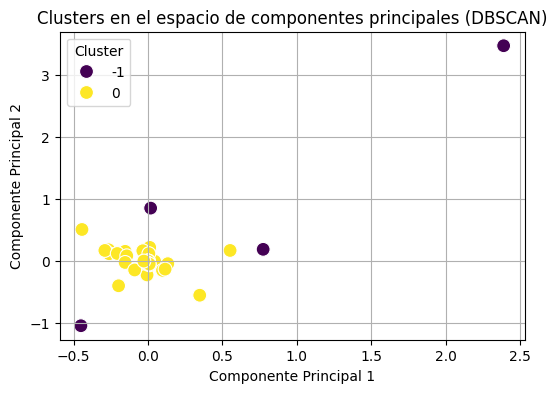

Número de puntos ruido: 4 de 40 (10.00%)


In [63]:
# Proyectar los datos en las dos primeras componentes principales
X_reducido = X @ V[:, :2]  # Transponer X para que las observaciones sean filas

# Ajustar y aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_reducido)

# Convertir el resultado a un DataFrame para facilitar la visualización
df_dbscan = pd.DataFrame(X_reducido, columns=['Componente 1', 'Componente 2'])
df_dbscan['Cluster'] = clusters_dbscan

# Graficar los resultados de DBSCAN
plt.figure(figsize=(6, 4))
palette = sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(data=df_dbscan, x='Componente 1', y='Componente 2', hue='Cluster', palette=palette, s=100)
plt.title('Clusters en el espacio de componentes principales (DBSCAN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Análisis de ruido
n_noise = np.sum(clusters_dbscan == -1)
total_points = df_dbscan.shape[0]
print(f"Número de puntos ruido: {n_noise} de {total_points} ({(n_noise / total_points) * 100:.2f}%)")

### Consigna 11

Definimos una funcion para calcular todas las normas de las proyecciones, buscar el indice del menor y mayor, y graficar las filas de esos indices en la matriz original

In [66]:
def perfilProduccion(A,v1,v2):
    proyectada = proyectar(A,v1,v2)
    normas = []
    for i in proyectada:
        normas.append(np.linalg.norm(i,2))
    
    normaMin = np.argmin(normas)
    normaMax = np.argmax(normas)
    grafMin = A[normaMin] # puedo usar el indice de la menor norma con la matriz ya mantiene los lugares
    grafMax =A[normaMax]
    
    graficoMin = pd.DataFrame({f"Producción Sector {normaMin+1}":grafMin})  #Le sumo 1 para que el index quede del mismo numero que los sectores
    graficoMax = pd.DataFrame({f"Producción Sector {normaMax+1}":grafMax})
    
    graficoMin.index = Pry_col
    graficoMax.index = Pry_col   

    graficoProyectado = pd.DataFrame({"Componente 1":proyectada[:,0],"Componente 2":proyectada[:,1]})
    graficoProyectadoMinMax = graficoProyectado.loc[[normaMin,normaMax]]
    graficoProyectadoMinMax = graficoProyectadoMinMax.reset_index(drop = True)
    ax = graficoProyectadoMinMax.plot(
        kind="scatter", 
        x = "Componente 1",
        y = "Componente 2",
        rot=45, 
        title='Producción minima y maxima en CPA proyectado ',
        figsize=(20, 5),
        xlabel='Componente 1',
        ylabel='Componente 2'
    )    
    n = [f"Sector {normaMin+1}" ,f"Sector {normaMax+1}"]
    for i, txt in enumerate(n):
        ax.text(graficoProyectadoMinMax['Componente 1'][i], graficoProyectadoMinMax['Componente 2'][i], f'{n[i]}', ha='right', va='bottom')
    
    graficoMin.plot(
        kind="bar", 
        rot=45, 
        title='Producción minima',
        figsize=(20, 5),
        xlabel='Sectores',
        ylabel='Millones de dólares'' (US$)'
    ).legend(loc='upper center')
                                                                                   
    graficoMax.plot(
        kind="bar", 
        rot=45, 
        title='Producción maxima',
        figsize=(20, 5),
        xlabel=('Sectores'),
        ylabel='Millones de dólares'' (US$)'
    ).legend(loc='upper center')

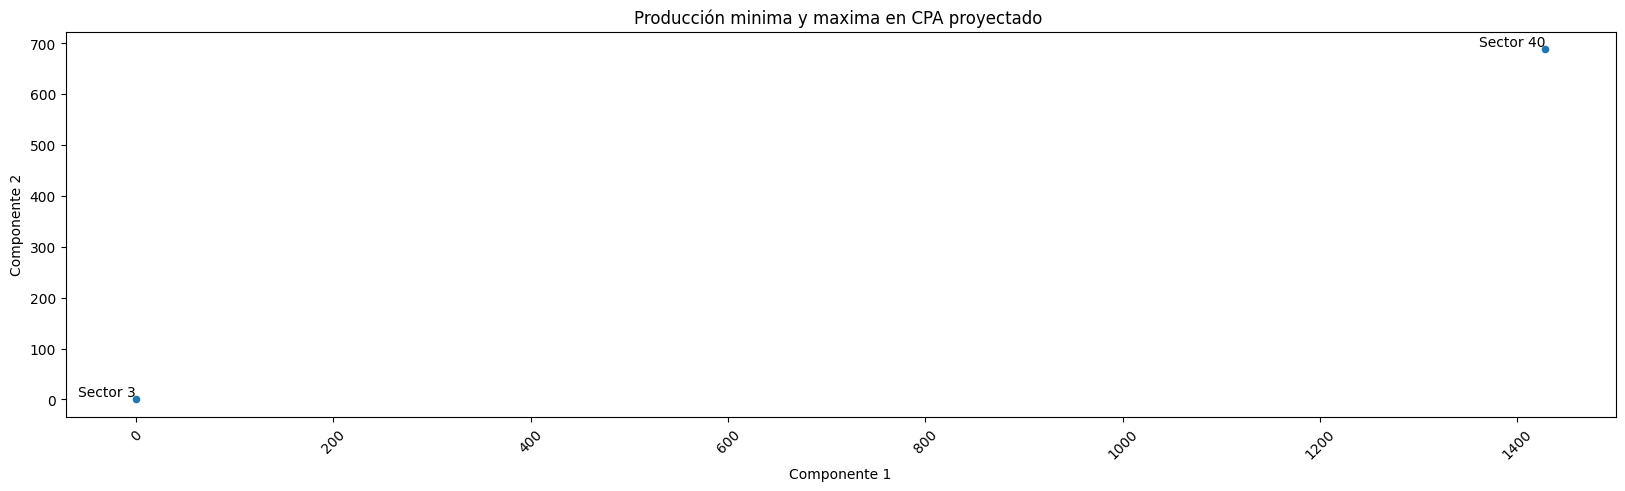

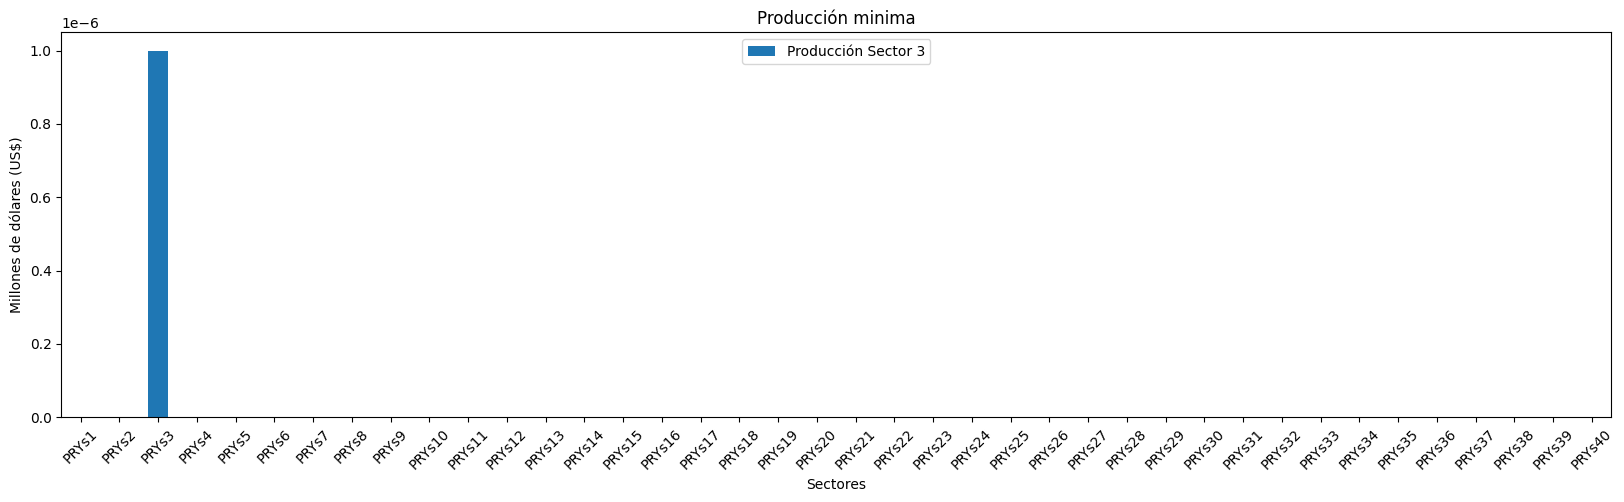

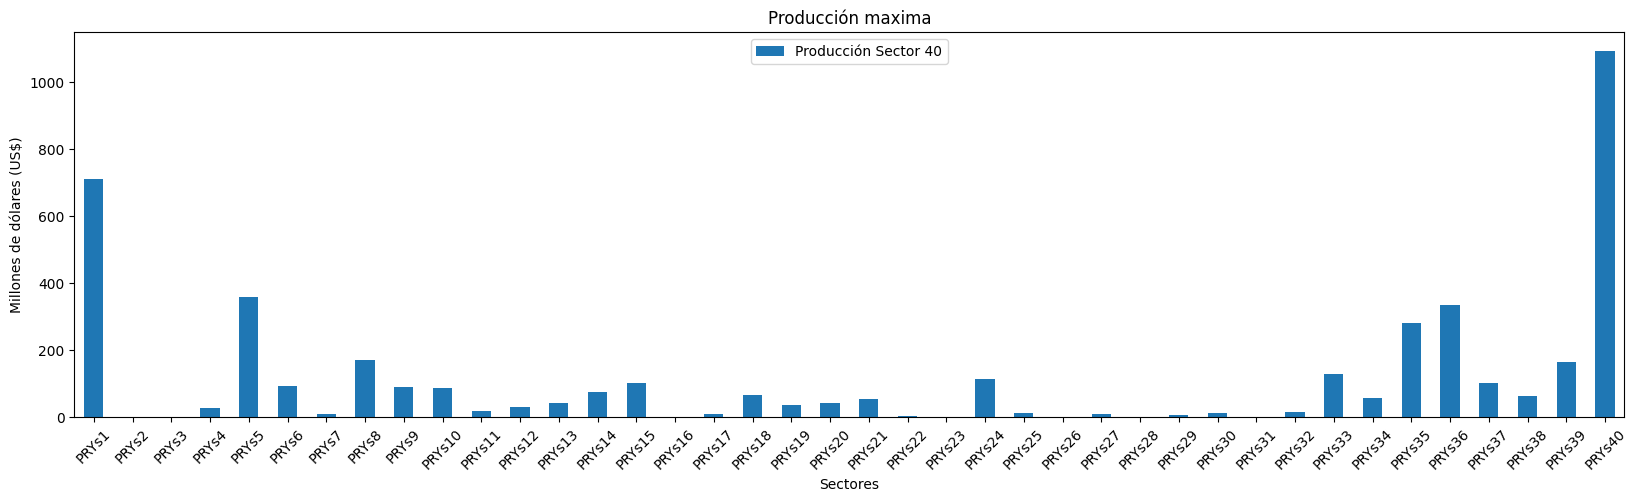

In [67]:
perfilProduccion(Pry_int.to_numpy(),vectH,vectH2)

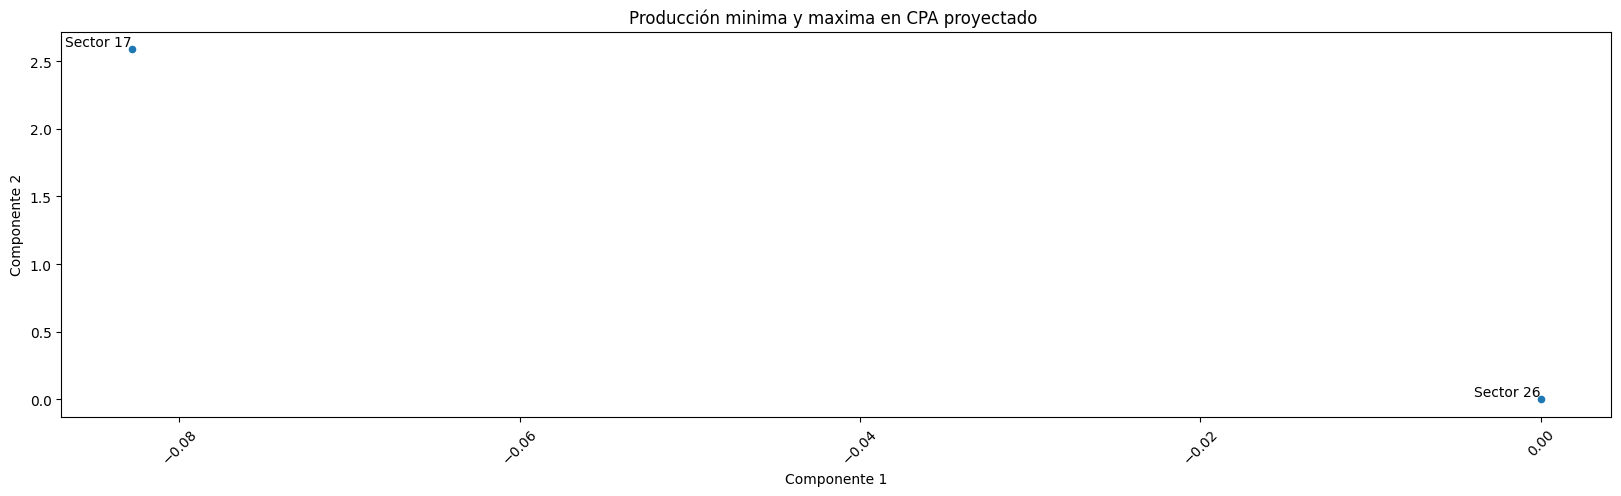

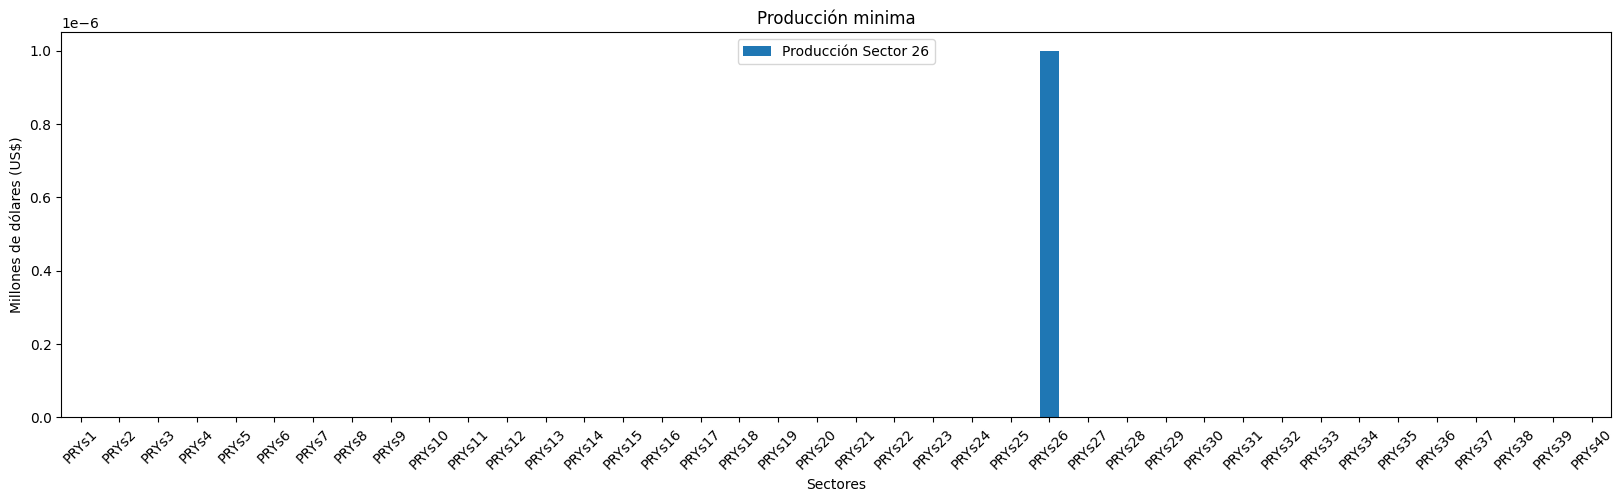

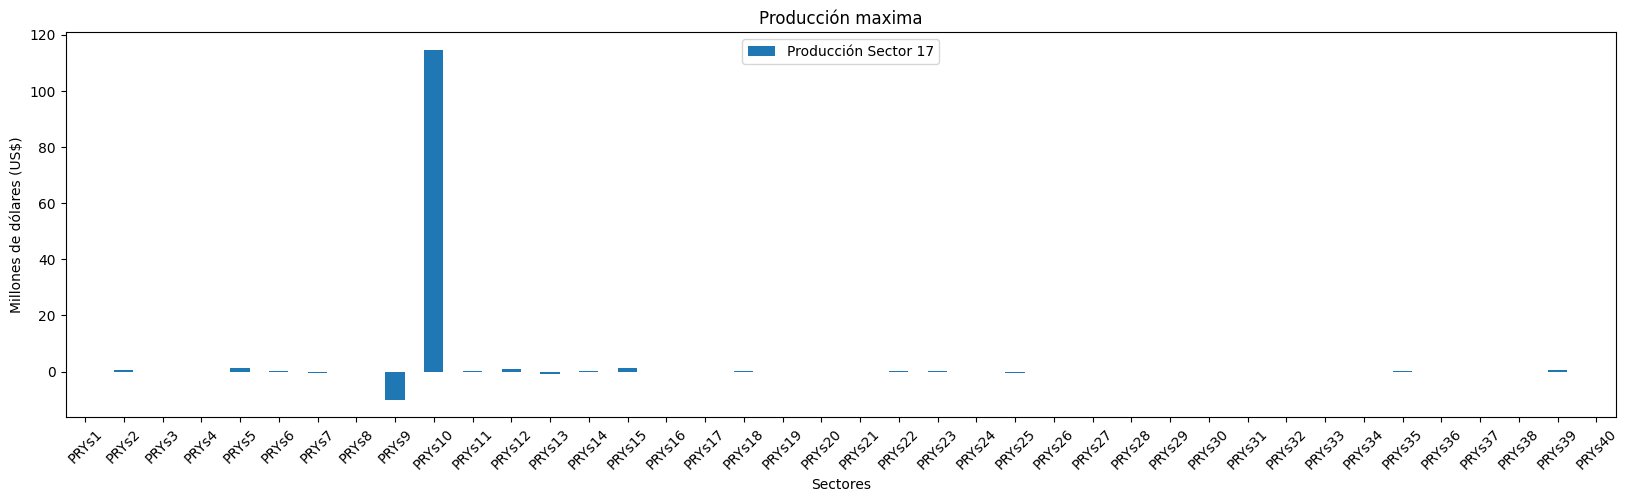

In [68]:
perfilProduccion(H.to_numpy(),V[:,0],V[:,1])

La norma de los datos proyectados en las dos direcciones de mayor cambio puede interpretarse como un indicador del flujo de dinero en cada sector. Esto se debe a que la multiplicación de la matriz por los autovectores equivale a una combinación lineal de los elementos de cada fila con los componentes del vector. Así, cuando un sector tiene un mayor flujo de dinero, su norma proyectada en estas direcciones tiende a ser mayor.  
Esta relación se observa claramente en los gráficos: el sector 2 de la matriz $A^{rr}$ y el sector 25 de la matriz $H$ muestran los menores flujos de dinero, mientras que el sector 39 de la matriz $A^{rr}$ y el sector 16 de la matriz $H$ tienen mayor actividad económica.